# Analisando notas em geral

In [1]:
import pandas as pd

notas = pd.read_csv("ml-latest-small/ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
notas.columns = ['usuarioID','filmeID','nota','momento']
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [4]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [5]:
print(notas['nota'].mean())
print(notas['nota'].median())

3.501556983616962
3.5


In [6]:
notas.nota.plot(kind='hist')

In [7]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [8]:
import seaborn as sns

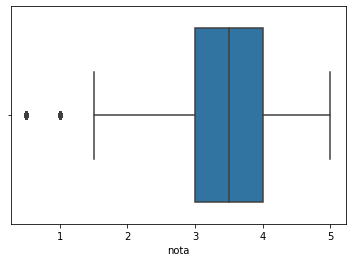

In [9]:
sns.boxplot(notas.nota)

# Visualizando dataset filmes

In [10]:
filmes = pd.read_csv("ml-latest-small/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando as notas por filme

In [11]:
#QUERY = Similar ao SQL

notas.query("filmeID==1").nota.mean()

3.9209302325581397

In [12]:
#QUERY = Similar ao SQL

notas.query("filmeID==2").nota.mean()

3.4318181818181817

In [13]:
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [14]:
#Agrupando todas as notas
#nota = média de todas as notas de um filme agrupadas

medias_por_filme = notas.groupby("filmeID").mean()["nota"]
medias_por_filme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

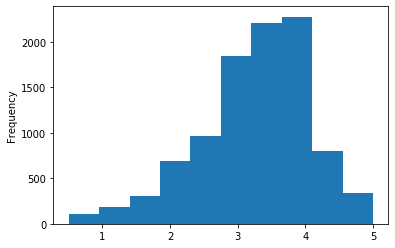

In [15]:
medias_por_filme.plot(kind='hist')

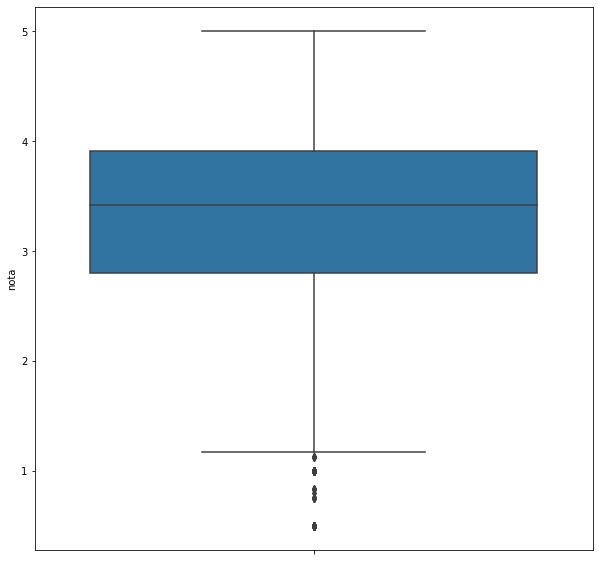

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.boxplot(y=medias_por_filme)

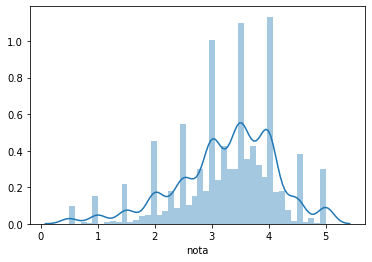

In [17]:
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Médias dos filmes')

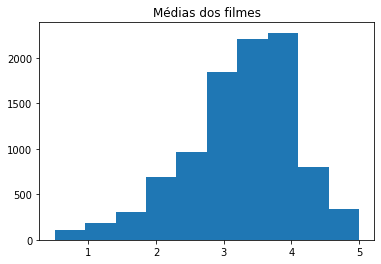

In [18]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Médias dos filmes")

In [19]:
tmdb = pd.read_csv("archive/tmdb_5000_movies.csv")
tmdb

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [20]:
#Variáveis categóricas nominais

tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [21]:
#primeiro grau
#segundo grau
#terceiro grau

#Variáveis categóricas ordinais

In [22]:
#budget => varíavel quantitativa contínuo (Sem intervalo definido)
#quantidade de votos => 1,2,3,4 variável quantitativa intervalar

In [23]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["Original Language","Total"]
contagem_de_lingua.head()

,Original Language,Total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


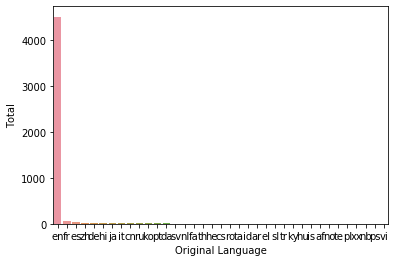

In [24]:
#Plotando gráfico de barras


sns.barplot(x = "Original Language", y ="Total", data = contagem_de_lingua)

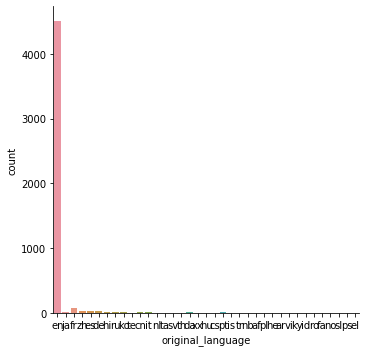

In [25]:
sns.catplot(x = "original_language", kind='count', data = tmdb)

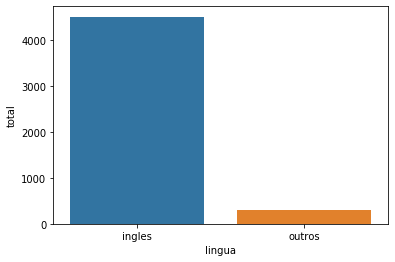

In [26]:
#loc = localizar
total_por_linha = tmdb['original_language'].value_counts()
total_ingles = total_por_linha.loc['en']
total_geral = total_por_linha.sum()
outras_linguas = total_geral - total_ingles

dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_ingles, outras_linguas]
}

dados = pd.DataFrame(dados)

sns.barplot(x='lingua', y='total', data = dados)

([<matplotlib.patches.Wedge at 0x161b4d53c48>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

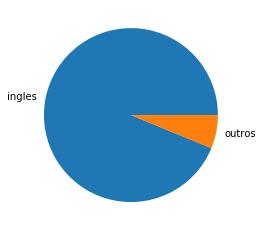

In [28]:
#Não deve ser usado, a compreensão é muito difícil
plt.pie(dados['total'], labels = dados['lingua'])

In [39]:
total_lingua_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_lingua_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
th     3
he     3
ta     2
ro     2
id     2
cs     2
ar     2
sl     1
is     1
el     1
te     1
nb     1
vi     1
af     1
pl     1
xx     1
ps     1
tr     1
hu     1
no     1
ky     1
Name: original_language, dtype: int64

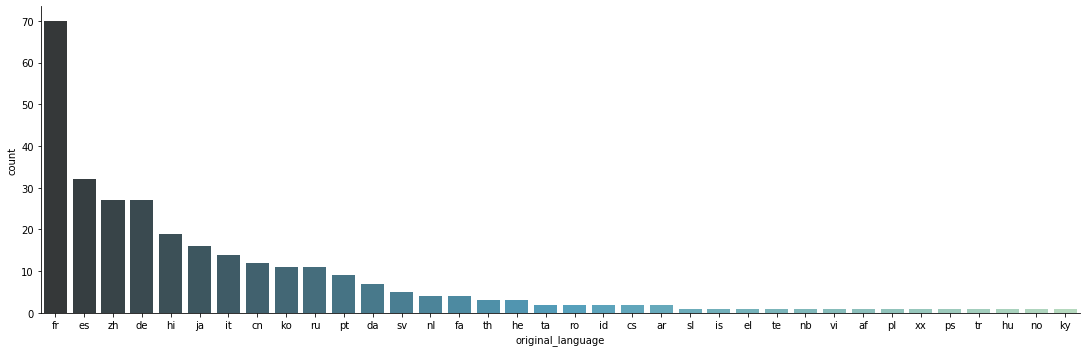

In [50]:
linguas_sem_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", kind='count', data = linguas_sem_ingles, order = total_lingua_outros_filmes.index, aspect=3, palette="GnBu_d")

## Estudo Estatístico

In [52]:
filmes.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [53]:
notas.head(2)

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [73]:
notasToyStory = notas.query('filmeID==1')
notasJumanji = notas.query('filmeID==2')

print('Nota média do toy story: {:.2f}'.format(notasToyStory.nota.mean()))
print('Nota média do Jumanji: {:.2f}'.format(notasJumanji.nota.mean()))

Nota média do toy story: 3.92
Nota média do Jumanji: 3.43


In [74]:
print('Nota mediana do toy story: {:.2f}'.format(notasToyStory.nota.median()))
print('Nota mediana do Jumanji: {:.2f}'.format(notasJumanji.nota.median()))

Nota mediana do toy story: 4.00
Nota mediana do Jumanji: 3.50


In [82]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10),np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10),np.array([1] * 10))

In [88]:
print(filme1.mean(), filme2.mean()) #A média pode enganar, não mostra a distriibuição
print(np.median(filme1), np.median(filme2)) #A mediana pode enganar, não mostra a distriibuição

3.0 3.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

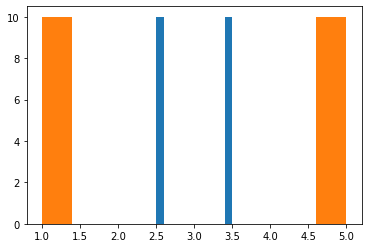

In [91]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x161c3a652c8>,
 'caps': [<matplotlib.lines.Line2D at 0x161c331c7c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x161c3a65308>,
 'medians': [<matplotlib.lines.Line2D at 0x161c37bb448>,
 'fliers': [<matplotlib.lines.Line2D at 0x161c38f4188>,
 'means': []}

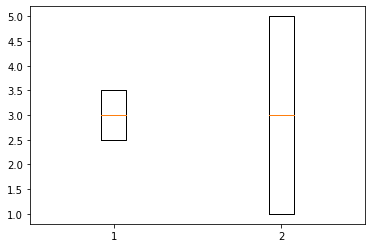

In [95]:
plt.boxplot([filme1, filme2])

{'whiskers': [<matplotlib.lines.Line2D at 0x161c3c3f548>,
 'caps': [<matplotlib.lines.Line2D at 0x161c3c3fd48>,
 'boxes': [<matplotlib.lines.Line2D at 0x161c3c37fc8>,
 'medians': [<matplotlib.lines.Line2D at 0x161c3c44b48>,
 'fliers': [<matplotlib.lines.Line2D at 0x161c3c15d48>,
 'means': []}

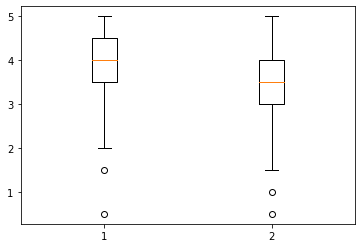

In [99]:
plt.boxplot([notasToyStory.nota, notasJumanji.nota])

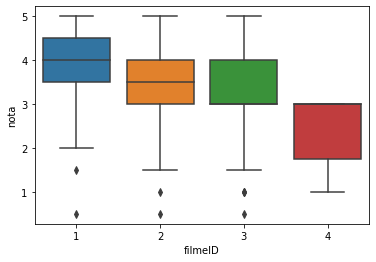

In [101]:
sns.boxplot(x = 'filmeID', y='nota', data = notas.query('filmeID in [1,2,3,4]'))

## Desvio Padrão

In [109]:
print(f'Desvio padrão Toy Story: {notasToyStory.nota.std()}')
print(f'Desvio padrão Jumanji: {notasJumanji.nota.std()}')

Desvio padrão Toy Story: 0.8348591407114045
Desvio padrão Jumanji: 0.8817134921476455


In [112]:
print(f'Desvio padrão Filme 1: {np.std(filme1)}')
print(f'Desvio padrão Filme 2: {np.std(filme2)}')

Desvio padrão Filme 1: 0.5
Desvio padrão Filme 2: 2.0
